# Exercise 1 - American Airlines Employees

• The following repository https://drive.google.com/drive/folders/1MBXTCbUJbX6kRo4fnjsbOGvOZZ7SQFkV?
usp=sharing contains few files with the number of part-time and full-time employees of the major
airline companies in the United States:

In [1]:
library(tidyverse)
library(gridExtra)
library(ggplot2)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.2.0
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




### 1) read the data and import them in a data.frame or tibble structure

The tibbles are read from different files. To each of them is been added a columns indicating the Company name abbreviation.

In [2]:
aa <- read_tsv('american_airline_empl.txt', show_col_types = F)
aa <- aa %>% add_column(Company='AA')

da <- read_tsv('delta_airline_empl.txt', show_col_types = F)
da <- da %>% add_column(Company='DA')

fe <- read_tsv('federal_express_empl.txt', show_col_types = F)
fe <- fe %>% add_column(Company='FE')


ua <- read_tsv('united_airline_empl.txt', show_col_types = F)
ua <- ua %>% add_column(Company='UA')

### 2) merge the four data tibble in a common tibble

The tibbles are merged vertically over all the columns

In [3]:
df <- bind_rows(aa, da, fe, ua)
str(df)

spc_tbl_ [1,588 × 6] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Month     : num [1:1588] 1 2 3 4 5 6 7 8 9 10 ...
 $ Year      : num [1:1588] 1990 1990 1990 1990 1990 1990 1990 1990 1990 1990 ...
 $ Fulltime  : num [1:1588] 68137 68725 69509 69713 70376 ...
 $ Parttime  : num [1:1588] 9039 9273 9376 9326 9309 ...
 $ GrandTotal: num [1:1588] 77176 77998 78885 79039 79685 ...
 $ Company   : chr [1:1588] "AA" "AA" "AA" "AA" ...
 - attr(*, "spec")=
  .. cols(
  ..   Month = col_double(),
  ..   Year = col_double(),
  ..   Fulltime = col_number(),
  ..   Parttime = col_number(),
  ..   GrandTotal = col_number()
  .. )
 - attr(*, "problems")=<externalptr> 


3) produce a plot of the behaviour of the employees as a function of time for all four companies,
separately for the number of full-time and part-time employees

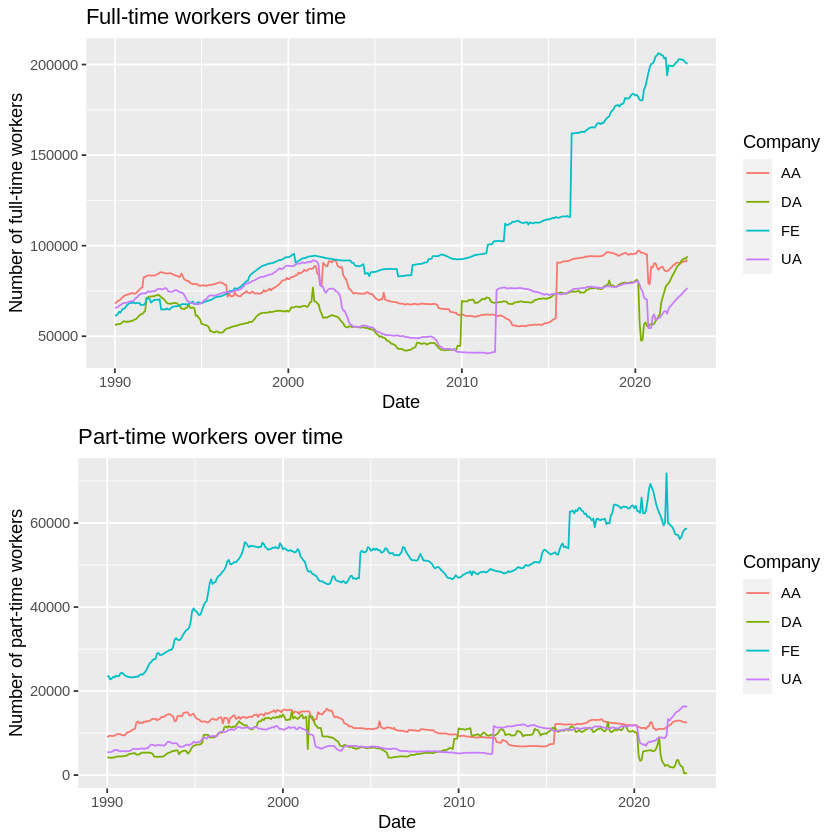

In [4]:
df <- df |> add_column(Date = make_date(year = df$Year, month = df$Month, day = 1))

p1 <- ggplot(df, aes(x=Date, y=Fulltime, color=Company))+geom_line() + labs(title = 'Full-time workers over time', x='Date', y='Number of full-time workers')
p2 <- ggplot(df, aes(x=Date, y=Parttime, color=Company))+geom_line() + labs(title = 'Part-time workers over time', x='Date', y='Number of part-time workers')
grid.arrange(grobs=list(p1, p2), nrow=2)

4) when did each company reach the minimum and maximum number of employess ?

In [5]:
minFull <- df |> group_by(Company) |> filter(Fulltime==min(Fulltime)) |> summarise(Company, Date)
minPart <- df |> group_by(Company) |> filter(Parttime==min(Parttime)) |> summarise(Company, Date)

maxFull <- df |> group_by(Company) |> filter(Fulltime==max(Fulltime)) |> summarise(Company, Date)
maxPart <- df |> group_by(Company) |> filter(Parttime==max(Parttime)) |> summarise(Company, Date)

In [6]:
cat('Minimum number of employee full time')
minFull
cat('\n Minimum number of employee part time')
minPart
cat('\n Maximum number of employee full time')
maxFull
cat('\n Maximum number of employee part time')
maxPart

Minimum number of employee full time

Company Date      
1 AA      2013-05-01
2 DA      2006-11-01
3 FE      1990-01-01
4 UA      2011-06-01


 Minimum number of employee part time

Company Date      
1 AA      2014-12-01
2 DA      2022-11-01
3 FE      1990-03-01
4 UA      2011-11-01


 Maximum number of employee full time

Company Date      
1 AA      2020-03-01
2 DA      2023-01-01
3 FE      2021-05-01
4 UA      2001-06-01


 Maximum number of employee part time

Company Date      
1 AA      2002-07-01
2 DA      2000-07-01
3 FE      2021-11-01
4 UA      2023-01-01

5) plot the fraction of part-time worker over the total employess as a function of time

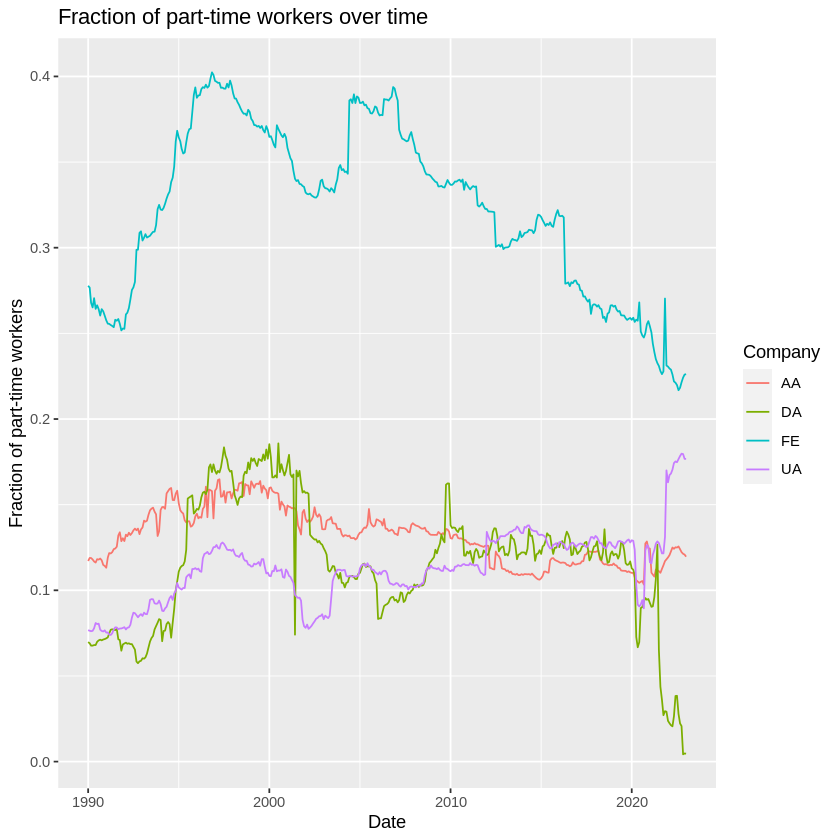

In [7]:
df |> ggplot(aes(x=Date, y=Parttime/GrandTotal, color=Company))+geom_line()+
    labs(title = 'Fraction of part-time workers over time', x='Date', y='Fraction of part-time workers')

6) did the COVID-19 pandemic have any influence in the employed workers of the airline companies
? Can you see a trend in the years 2019-2023 ?

For all companies, except FE, we see an inflation of the number of workers between 2020 and 2021.

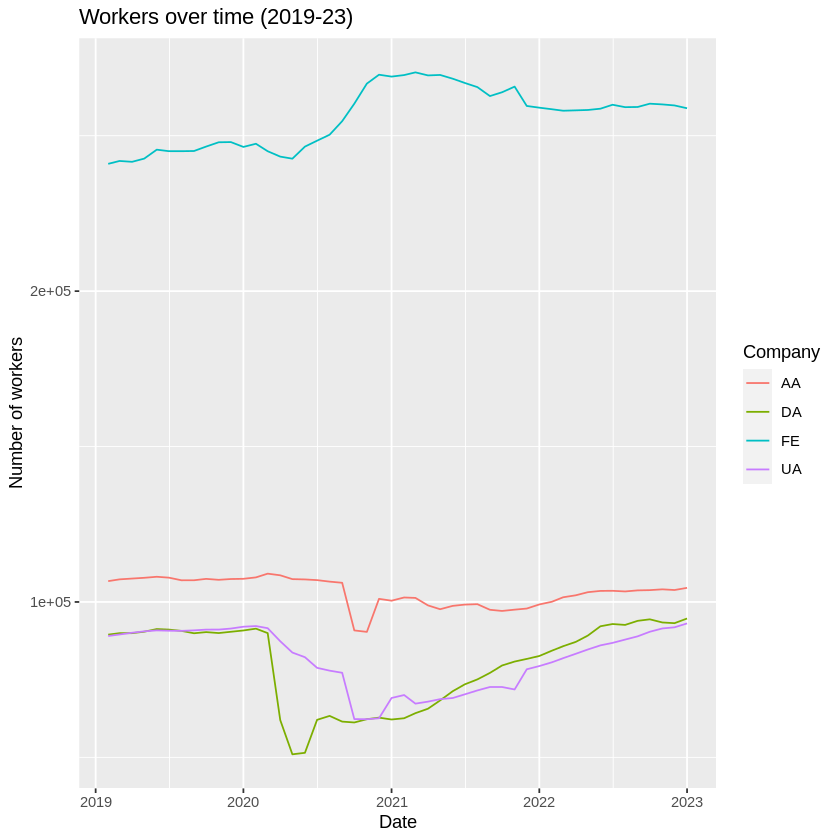

In [8]:
df |> filter(Date> '2019-01-01') |> ggplot(aes(x=Date, y=GrandTotal, color=Company))+geom_line()+
    labs(title = 'Workers over time (2019-23)', x='Date', y='Number of workers')

# Exercise 2 - Data Frames and Tibble
• the nycflights13 R package [1] contains data on all flights departing from New Your City airports
in 2013. All available data is organized into four tibbles [1] :
- airlines: contains metadata on airlines names and corresponding carrier codes
- airports: contains metadata on all airports connected to NYC
- flights: has data of all flights departing from the three NYC airports (JFK, LGA and EWR) in
2013
- planes: Plane metadata for all plane numbers found in the FAA aircraft registry.
further descriptions can be found here [1].

In [9]:
library ( nycflights13 )

1.1) Plot the total number of flights departed from each of the three NYC airports as a function of time
(one entry for each of the 365 days of the year)

## 1.1) Plot the total number of flights departed from each of the three NYC airports as a function of time
(one entry for each of the 365 days of the year).

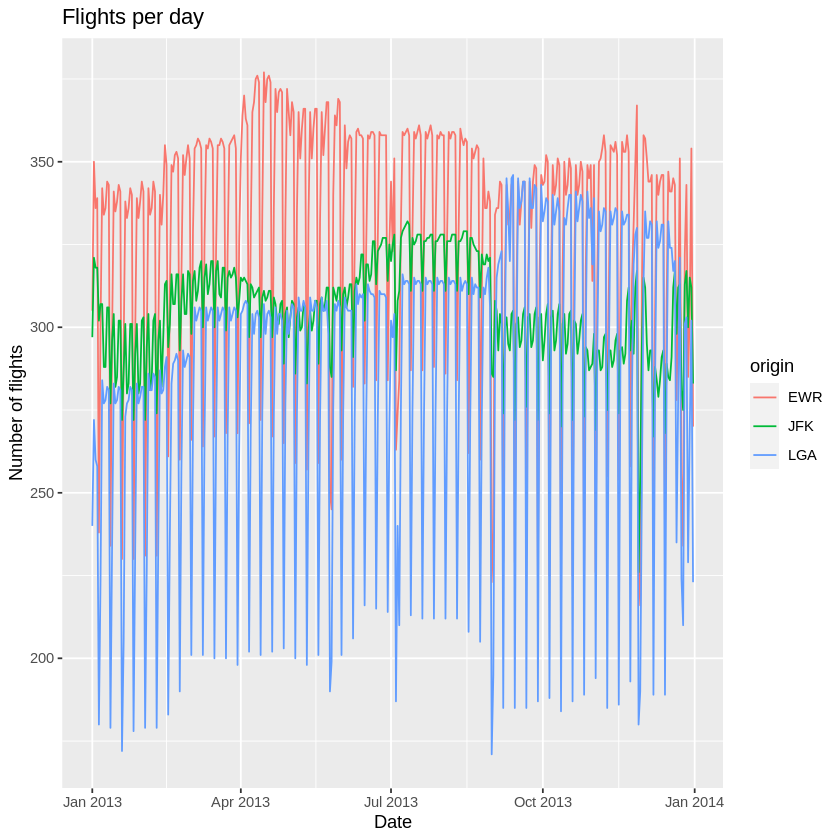

In [10]:
df_f <- flights |> add_column(date = make_date(year = flights$year, month = flights$month, day = flights$day ))
df_f <- df_f |> add_column(dname = wday(df_f$date), wk = week(df_f$date))

df_f |> count(date, origin) |> ggplot(aes(x=date, y=n, color=origin))+geom_line()+
        labs(title = 'Flights per day', x='Date', y='Number of flights')

## 1.2) Plot the average number of flights computed over the first five working days of each week as afunction of the week number of the year. Produce the same plot for the flights departing over the weekend (Saturdays and Sundays).

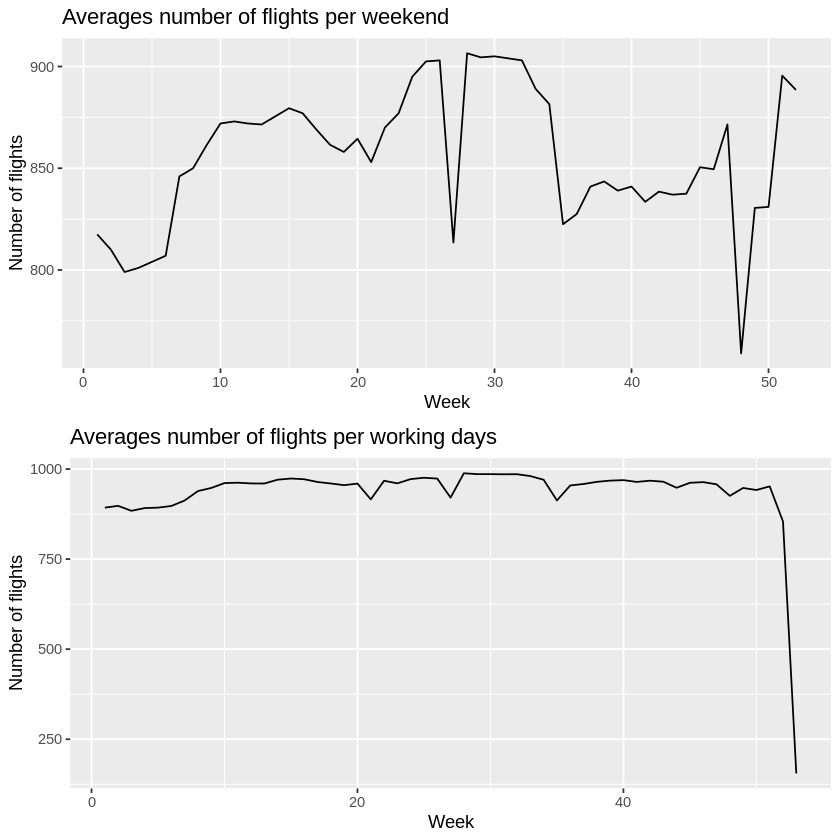

In [11]:
flightsXweek <- df_f |> count(wk)

workd_f <- df_f |> filter(dname != 6 & dname != 7) |> count(week =wk) 
wkend_f <- df_f |> filter(dname == 6 | dname == 7) |> count(week =wk) 


wkend_f |> ggplot()+geom_line(aes(x=week, y=n/2)) +
            labs(title = 'Averages number of flights per weekend', x='Week', y='Number of flights') -> p_work
                              
workd_f |> ggplot() + geom_line(aes(x=week, y=n/5)) +
            labs(title = 'Averages number of flights per working days', x='Week', y='Number of flights') -> p_week

grid.arrange(grobs=list(p_work, p_week), nrow=2)

## 2.1) For each flight in the data frame, compute the departure delay1 and extract the following pieces of information (separately for each NYC airport):

- min, max and average delay for each day of the year (show the data in corresponding plots)

I choose to define delay as the quantity of time after the scheduled one. So will be taken into account only rows with delay grater than 0

In [12]:
min_del <- df_f |> filter(dep_delay > 0) |> group_by(date, origin) |>
        reframe(date, origin, delay =min(dep_delay)) |>
        add_column('min')
max_del <- df_f |> filter(dep_delay > 0) |> group_by(date, origin) |> 
        reframe(date, origin, delay =max(dep_delay)) |>
        add_column('max')
avg_del <- df_f |> filter(dep_delay > 0) |> group_by(date, origin) |>
        reframe(date, origin, delay =mean(dep_delay)) |>
        add_column('avg')

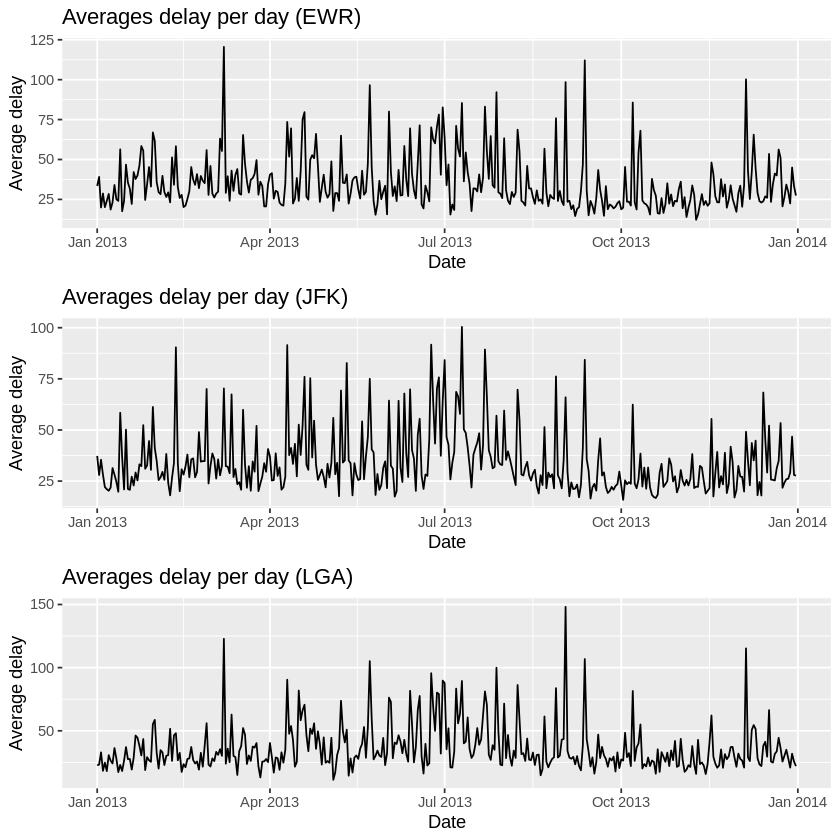

In [13]:
avg_del |> filter(origin=='EWR') |>ggplot(aes(x=date, y=delay))+geom_line()+
    labs(title = 'Averages delay per day (EWR)', x='Date', y='Average delay')-> avg_ewr

avg_del |> filter(origin=='JFK') |>ggplot(aes(x=date, y=delay))+geom_line()+
    labs(title = 'Averages delay per day (JFK)', x='Date', y='Average delay') -> avg_jfk

avg_del |> filter(origin=='LGA') |>ggplot(aes(x=date, y=delay))+geom_line()+
    labs(title = 'Averages delay per day (LGA)', x='Date', y='Average delay') -> avg_lga

grid.arrange(grobs=list(avg_ewr, avg_jfk, avg_lga), nrow=3)

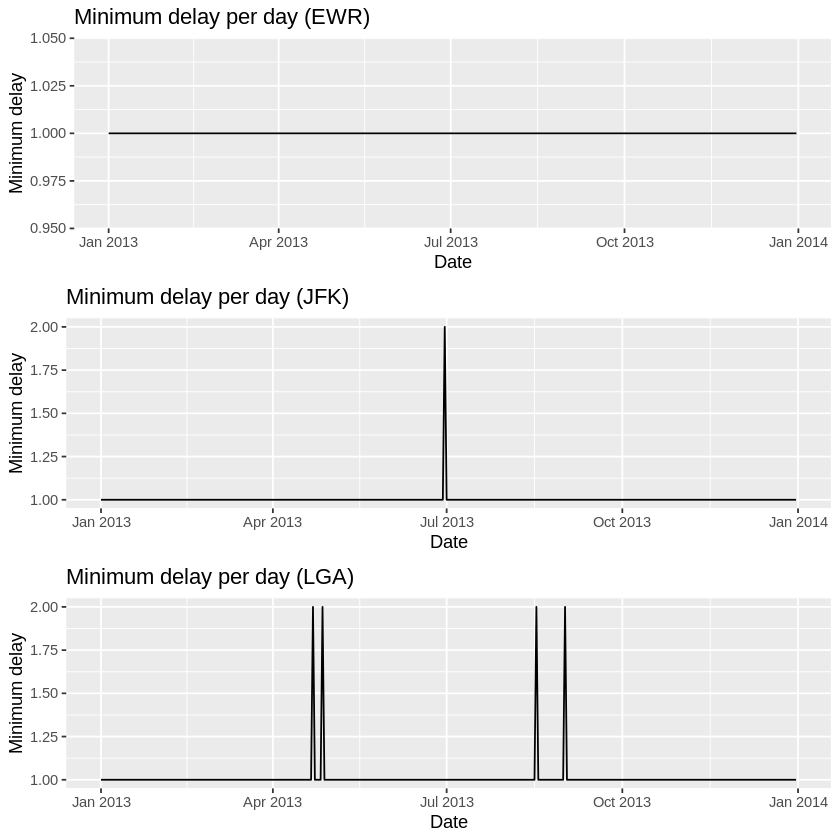

In [14]:
min_del |> filter(origin=='EWR') |>ggplot(aes(x=date, y=delay))+geom_line()+
    labs(title = 'Minimum delay per day (EWR)', x='Date', y='Minimum delay')-> min_ewr

min_del |> filter(origin=='JFK') |>ggplot(aes(x=date, y=delay))+geom_line()+
    labs(title = 'Minimum delay per day (JFK)', x='Date', y='Minimum delay') -> min_jfk

min_del |> filter(origin=='LGA') |>ggplot(aes(x=date, y=delay))+geom_line()+
    labs(title = 'Minimum delay per day (LGA)', x='Date', y='Minimum delay') -> min_lga

grid.arrange(grobs=list(min_ewr, min_jfk, min_lga), nrow=3)

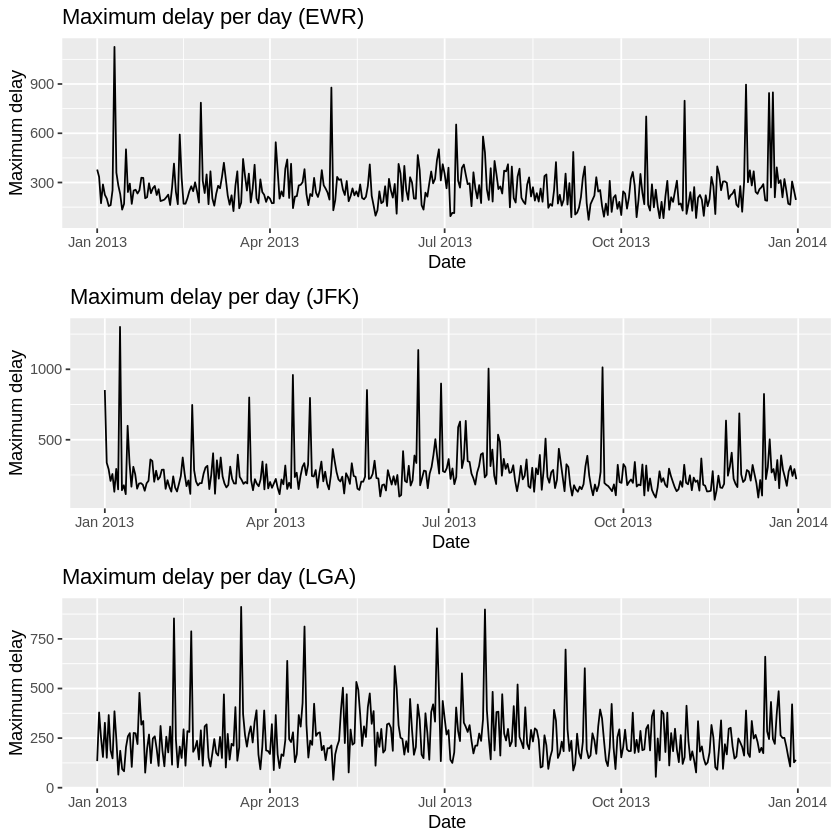

In [15]:
max_del |> filter(origin=='EWR') |>ggplot(aes(x=date, y=delay))+geom_line()+
    labs(title = 'Maximum delay per day (EWR)', x='Date', y='Maximum delay')-> max_ewr

max_del |> filter(origin=='JFK') |>ggplot(aes(x=date, y=delay))+geom_line()+
    labs(title = 'Maximum delay per day (JFK)', x='Date', y='Maximum delay') -> max_jfk

max_del |> filter(origin=='LGA') |>ggplot(aes(x=date, y=delay))+geom_line()+
    labs(title = 'Maximum delay per day (LGA)', x='Date', y='Maximum delay') -> max_lga

grid.arrange(grobs=list(max_ewr, max_jfk, max_lga), nrow=3)

## 3) assuming the distance flew by the plane is, at first approximation, the distance between the two connecting airports (as given in the data frame), compute the average speed of each plane. Produce a plot of the average plane speed as a function of departure day of the year

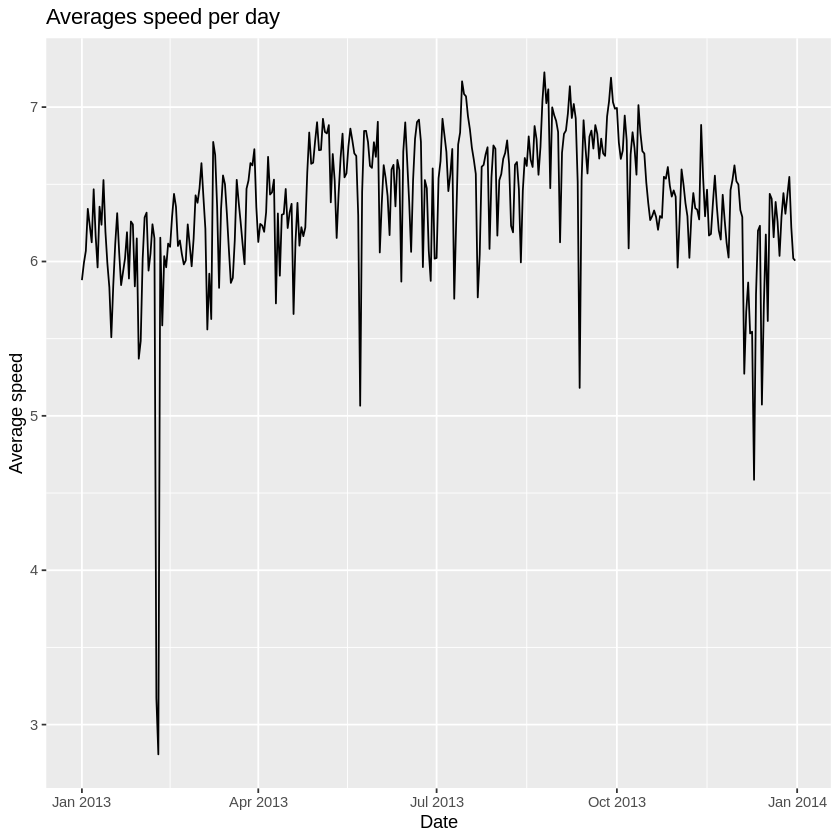

In [16]:
df_fs <-df_f |> add_column(avg_speed = df_f$distance/df_f$air_time) |>
        mutate_at(c('avg_speed'), ~replace_na(.,0))|>
        group_by(date) |> reframe(date, avg_v = mean(avg_speed))


df_fs |> ggplot(aes(x=date, y=avg_v))+geom_line()+
    labs(title = 'Averages speed per day', x='Date', y='Average speed')

## 4) analyze the flights offered by each airline company and determine:
- the airline companies offering the largest two numbers of flights per day and per week;

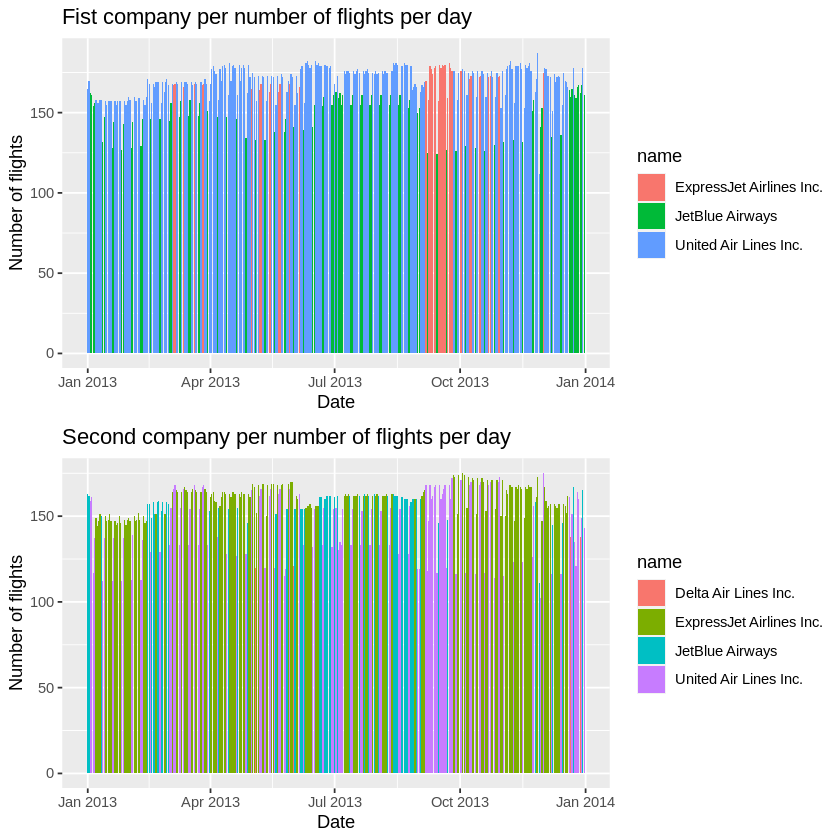

In [17]:
top1day <- df_f |> reframe(date, carrier, flight) |> right_join(airlines, by='carrier') |>
            count(date, name) |> group_by(date) |> arrange(desc(n), .by_group=T) |> slice(1:1)

top2day <- df_f |> reframe(date, carrier, flight) |> right_join(airlines, by='carrier') |>
            count(date, name) |> group_by(date) |> arrange(desc(n), .by_group=T) |> slice(2:2)

t1d<- top1day |> ggplot(aes(date)) + geom_bar(stat='identity', aes(y=n, fill=name))+
        labs(title = 'Fist company per number of flights per day', x='Date', y='Number of flights')
t2d<- top2day |> ggplot(aes(date)) + geom_bar(stat='identity', aes(y=n, fill=name))+
        labs(title = 'Second company per number of flights per day', x='Date', y='Number of flights')

grid.arrange(grobs=list(t1d, t2d), nrow=2)

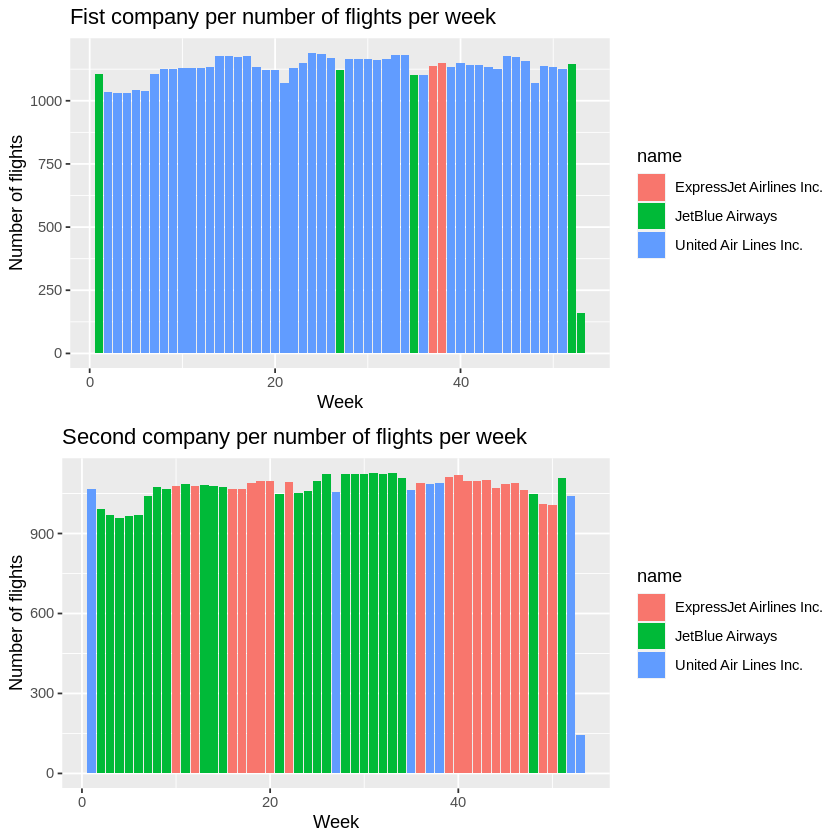

In [18]:
top1week <- df_f |> reframe(wk, carrier, flight) |> right_join(airlines, by='carrier') |>
            count(wk, name) |> group_by(wk) |> arrange(desc(n), .by_group=T) |> slice(1:1)

top2week <- df_f |> reframe(wk, carrier, flight) |> right_join(airlines, by='carrier') |>
            count(wk, name) |> group_by(wk) |> arrange(desc(n), .by_group=T) |> slice(2:2)

t1w<- top1week |> ggplot(aes(x=wk)) + geom_bar(stat='identity', aes(y=n, fill=name))+
        labs(title = 'Fist company per number of flights per week', x='Week', y='Number of flights')
t2w<- top2week |> ggplot(aes(x=wk)) + geom_bar(stat='identity', aes(y=n, fill=name))+
        labs(title = 'Second company per number of flights per week', x='Week', y='Number of flights')

grid.arrange(grobs=list(t1w, t2w), nrow=2)


- the airline company offering the smallest number of flight per month;

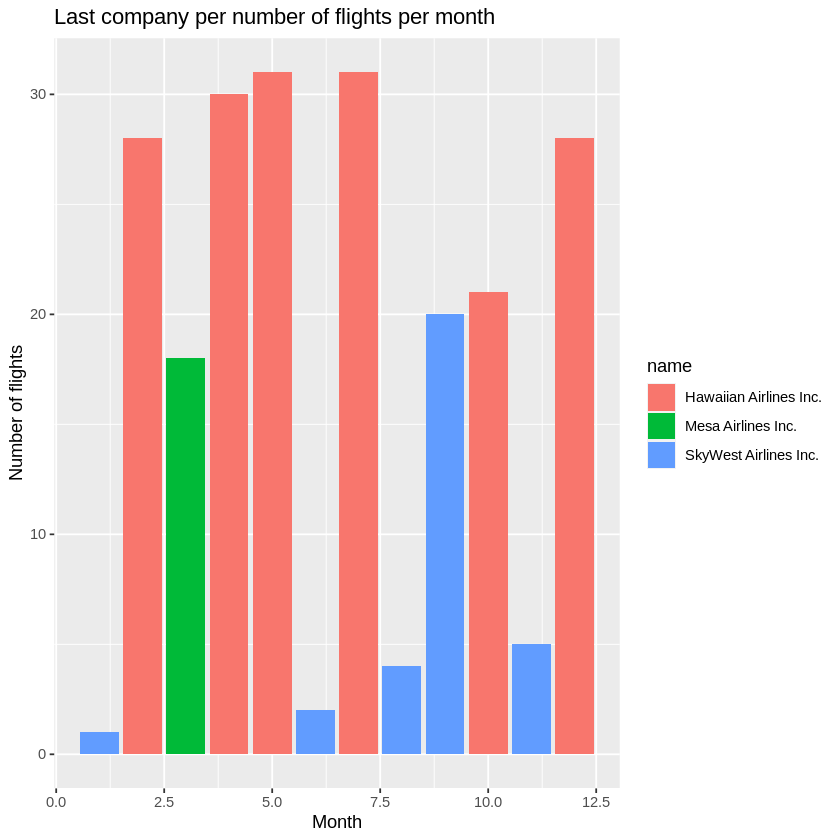

In [19]:
bot1month <- df_f |> reframe(month, carrier, flight) |> right_join(airlines, by='carrier') |>
            count(month, name) |> group_by(month) |> arrange(n, .by_group=T) |> slice(1)

bot1month |> ggplot(aes(x=month)) + geom_bar(stat='identity', aes(y=n, fill=name))+
    labs(title = 'Last company per number of flights per month', x='Month', y='Number of flights')

- the airline company offering the longest distance flight per month.

In [20]:
df_f |>  right_join(airlines, by='carrier') |> reframe(month, name, distance) |>
        group_by(month) |> arrange(desc(distance), .by_group=T) |> slice(1)

month name                   distance
1   1    Hawaiian Airlines Inc. 4983    
2   2    Hawaiian Airlines Inc. 4983    
3   3    Hawaiian Airlines Inc. 4983    
4   4    Hawaiian Airlines Inc. 4983    
5   5    Hawaiian Airlines Inc. 4983    
6   6    Hawaiian Airlines Inc. 4983    
7   7    Hawaiian Airlines Inc. 4983    
8   8    Hawaiian Airlines Inc. 4983    
9   9    Hawaiian Airlines Inc. 4983    
10 10    Hawaiian Airlines Inc. 4983    
11 11    Hawaiian Airlines Inc. 4983    
12 12    Hawaiian Airlines Inc. 4983

(you can produce plots, if you like, to visualize the results of the analysis)